In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 16 22:26:40 2021

@author: pmarc
Résolution Problème L11 - #2 par Pierre-Marc Juneau, 17 avril 2021
"""


import pandas as pd


In [3]:

donnee = pd.read_csv('../../04_Eda/13/Fichiers/irisv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


/tmp/ipykernel_213715/1440922136.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=donnee.drop({'Espèces'}, 1)


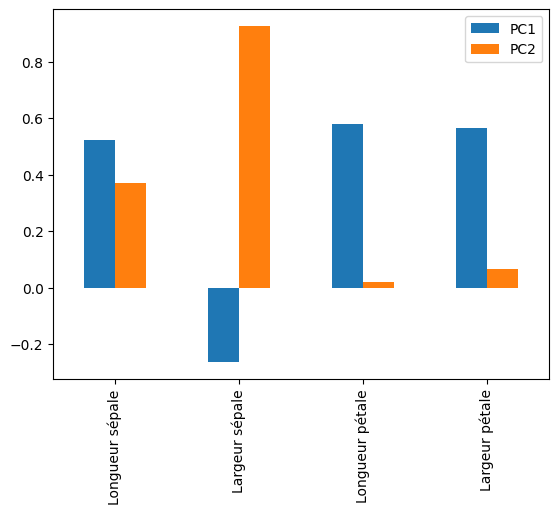

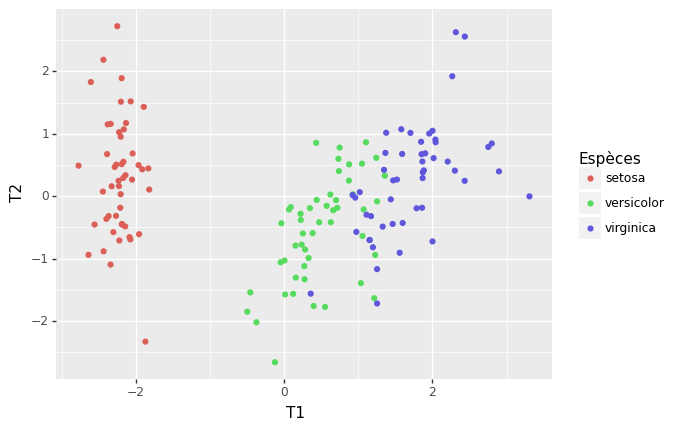

In [4]:

X=donnee.drop({'Espèces'}, 1)
Yclass=donnee['Espèces']

"Stardardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns



from sklearn.decomposition import PCA
a=2
pca = PCA(n_components=a)
pca.fit(Xstand)
VarianceCapturee=pca.explained_variance_ratio_
X_pca_mean=pca.mean_
T=pca.transform(Xstand)
P=pca.components_

TPanda=pd.DataFrame(T)
TPanda.index=X.index
TPanda.columns=['T1','T2']
T_resultats=pd.concat([TPanda,Yclass],axis=1)

PPanda=pd.DataFrame(P.T)
PPanda.index=X.columns
PPanda.columns=['PC1','PC2']

PPanda.plot.bar()

import plotnine as p9
graph = p9.ggplot(data=T_resultats,
           mapping=p9.aes(x='T1', y='T2', color='Espèces'))
print(graph + p9.geom_point())